# Completion Histogram
## ENGR 102 COCC
### Bruce Emerson 3/3/2025

This notebook is meant to generate the data representation I need for an A3 problem solving activity in class.

[Week 9 Content](https://github.com/smithrockmaker/ENGR102/blob/main/Classroom/Week9Content.md) 

What I'm trying to represent here is the distribution of completion times for students in the class. What can we do to improve self starting and earlier completion of activities.

## Dependencies

As we talked about previously there are a number of what are called libraries that allow us to add tools to our notebooks. These libraries only need to be accessed once in a given notebook. The general approach is to load any needed tools at the begining of the notebook. These libraries themselve use other libraries which are called dependencies. This is how we load the various libraries of python tools that are needed for the particular work we are undertaking. 

To access commands from these libraries we have to type the entire name of the library which is often aggravating and time consuming. More typically we give the imported library an "alias' which is a shorthand for the long library name. The language to bring the library onboard and to give it an alias is ```import [library] as [alias]```.
  
```numpy``` is a numerical tools library - often imported as np. ```numpy``` also contains the statistical tools that we will use in this lab. There are other libraries dedicated to statistical tools but 'numpy' has everything we need.  
```matplotlib```is a 'MATLAB like' library. 
```matplotlib.pyplot``` is often imported as ```plt``` to make it easier to use. ```matplotlib``` has the plotting tools that we need for this lab.  

The following code cell will need to be run first before any other code cells. This sometimes takes a while because a lot of code is being loaded during this process.

In [27]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt


## Lists (Vectors)

We usually talk about our data as a list of data points. In spreadsheets we enter data in a set of successive cells in a column or a row. There is a creature in python called a list which is a way of accomplishing a similar task.  

[python documentation: list](https://docs.python.org/3.7/tutorial/datastructures.html) This link to the python documentation for lists will bury you in features and uses of lists. It is easy and common to overwhelmed by the deluge of information which is why these notebooks are created. I include this reference link so you could explore more deeply if you have time to do so but what you actually need to understand for this lab is contained within this notebook.

Our lists need names so we can work with them later on. As we have disucssed it is best practice to use names that have relevant meaning. Note the square brackets and the comma as a separator between data points. The data here is made up so you will surely replace it with your data!

#### This Data:

The raw data is encoded with the month followed by the day. 125 is Jan 25. This makes it easy to enter the data. It will make it tougher to histogram because of the inconsistency in the numerical values. I will have to work this out later. See below....

### Filter Data

The format I used to input the data makes it reasonably convenient to do so but is terrible for plotting. I need to filter this data so that it represents days from posting to first submission (that's what is of interest at the moment.

**Step 1: Get number of days**

Assuming the post data is the earliest possible submission date we can subtract this value from all values to give number of days until submission. This obviously only works for the same month as the post date. All other dates will be offset by around 70 due to my format choices.

**Step 2: Filter for Unsubmitted**

At this point any unsubmitted assignments will be relatively large and the same. I want to find these, replace them with 0, then find the max of assignments turned in, then reset the unsubmitted values to 10 more than the current max of submitted assignments. This should give me a bar at the end of the histogram that holds only these values.

In [133]:
# data entry - First Set
data1 = [122,127,126,127,400,117,122,124,204,118,118,122,120,127,203,122,123,400,126,400,400,216,210,226,126,225]
data1posted = 113

# converting data format into days after post date that assignment submitted

daysLate1 = data1
lenMonth1 = 31
offsetMonth1 = 100 - lenMonth1
lenMonth2 = 28
offsetMonth2 = 100 - lenMonth2

for i in range(0, len(daysLate1)):
    daysLate1[i] = daysLate1[i]-data1posted
    if daysLate1[i] > lenMonth1: # more days than first month
        daysLate1[i] = daysLate1[i]- offsetMonth1
        if daysLate1[i] > (lenMonth1+lenMonth2): # more days than first 2 months
            daysLate1[i] = daysLate1[i]- offsetMonth2

# Filtering out the undubmitted data points and substituting a more useful value

data1Unsub = max(daysLate1)

for i in range(0, len(daysLate1)):
    if daysLate1[i] == data1Unsub:
        daysLate1[i] = -1

data1Max = max(daysLate1) # maximum of submitted assignments

for i in range(0, len(daysLate1)):
    if daysLate1[i] == -1:
        daysLate1[i] = 69

print("data points 1: ", len(daysLate1))
print("data1Max: ",data1Max)
print("data1: ", data1)
print("daysLate1: ", daysLate1)

data points 1:  26
data1Max:  44
data1:  [9, 14, 13, 14, 69, 4, 9, 11, 22, 5, 5, 9, 7, 14, 21, 9, 10, 69, 13, 69, 69, 34, 28, 44, 13, 43]
daysLate1:  [9, 14, 13, 14, 69, 4, 9, 11, 22, 5, 5, 9, 7, 14, 21, 9, 10, 69, 13, 69, 69, 34, 28, 44, 13, 43]


In [143]:
# data entry - Second Set
data2 = [219,124,126,127,400,128,127,124,204,220,223,223,226,204,123,129,129,400,202,400,219,216,210,400,213,219]
data2posted = 120

# converting data format into days after post date that assignment submitted

daysLate2 = data2
lenMonth1 = 31
offsetMonth1 = 100 - lenMonth1
lenMonth2 = 28
offsetMonth2 = 100 - lenMonth2

for i in range(0, len(daysLate2)):
    daysLate2[i] = daysLate2[i]-data2posted
    if daysLate2[i] > lenMonth1: # more days than first month
        daysLate2[i] = daysLate2[i]- offsetMonth1
        if daysLate2[i] > (lenMonth1+lenMonth2): # more days than first 2 months
            daysLate2[i] = daysLate2[i]- offsetMonth2

# Filtering out the undubmitted data points and substituting a more useful value

data2Unsub = max(daysLate2)

for i in range(0, len(daysLate2)):
    if daysLate2[i] == data2Unsub:
        daysLate2[i] = -1

data2Max = max(daysLate2) # maximum of submitted assignments

for i in range(0, len(daysLate2)):
    if daysLate2[i] == -1:
        daysLate2[i] = 69

print("data points 2: ", len(daysLate2))
print("data2Max: ",data2Max)
print("data2: ", data2)
print("daysLate2: ", daysLate2)

data points 2:  26
data2Max:  37
data2:  [30, 4, 6, 7, 69, 8, 7, 4, 15, 31, 34, 34, 37, 15, 3, 9, 9, 69, 13, 69, 30, 27, 21, 69, 24, 30]
daysLate2:  [30, 4, 6, 7, 69, 8, 7, 4, 15, 31, 34, 34, 37, 15, 3, 9, 9, 69, 13, 69, 30, 27, 21, 69, 24, 30]


In [145]:
# data entry - Third Set
data3 = [219,212,201,212,400,205,218,212,205,218,202,131,212,205,201,226,218,400,209,400,400,225,400,400,219,219]
data3posted = 126

# converting data format into days after post date that assignment submitted

daysLate3 = data3
lenMonth1 = 31
offsetMonth1 = 100 - lenMonth1
lenMonth2 = 28
offsetMonth2 = 100 - lenMonth2

for i in range(0, len(daysLate3)):
    daysLate3[i] = daysLate3[i]-data3posted
    if daysLate3[i] > lenMonth1: # more days than first month
        daysLate3[i] = daysLate3[i]- offsetMonth1
        if daysLate3[i] > (lenMonth1+lenMonth2): # more days than first 2 months
            daysLate3[i] = daysLate3[i]- offsetMonth2

# Filtering out the undubmitted data points and substituting a more useful value

data3Unsub = max(daysLate3)

for i in range(0, len(daysLate3)):
    if daysLate3[i] == data3Unsub:
        daysLate3[i] = -1

data3Max = max(daysLate3) # maximum of submitted assignments

for i in range(0, len(daysLate3)):
    if daysLate3[i] == -1:
        daysLate3[i] = 69

print("data points 3: ", len(daysLate3))
print("data3Max: ",data3Max)
print("data3: ", data3)
print("daysLate3: ", daysLate3)

data points 3:  26
data3Max:  31
data3:  [24, 17, 6, 17, 69, 10, 23, 17, 10, 23, 7, 5, 17, 10, 6, 31, 23, 69, 14, 69, 69, 30, 69, 69, 24, 24]
daysLate3:  [24, 17, 6, 17, 69, 10, 23, 17, 10, 23, 7, 5, 17, 10, 6, 31, 23, 69, 14, 69, 69, 30, 69, 69, 24, 24]


## Basic Histogram

From a structural point of view the plt.hist command creates the histogram which is displayed using the plt.show() command. THis is how many coding languages work. The code creates objects, in this case the histogram, and then there is a command that displays the object that is created. I don't want you to get down in the weeds about how that works this week. We will slowly move in that direction. As the plt.hist command generates the plot it also returns three bits of information - the heights of each bin (array), the edges of each bin (array), and the patch objects that are the bars that are plotted. For now we can ignore these information items that are returned from the ```plt.hist``` command. 

[matplotlib.pyplot.hist](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html)  


## Histogram Styles

In the ```plt.hist``` command there are a number of arguments that can be provided to control the features of the histogram that is produced. In the code I have broken each argument out onto an individual line to make them more clear. 
```
height, bins, patches = plt.hist(data1,
                                 num_bins,
                                 fullrange,
                                 histtype = "bar",
                                 rwidth = 0.9,
                                 color="tab:blue",
                                 alpha= .7
                                )
```

```data1``` is the name of the data list (vector) I want to generate the data from.  

```num_bins``` is an integer that tells the command how many different divisions I want across the possible value of my histogram. You will explore different values for num_bins to understand the impact of this argument on the how the histogram looks.

```bins = [0,7,14,21,28,35,42,49,56,63,70]``` Setting the second argument to a sequence defines the bin edges. Since weeks is a pretty good way to think about turning in assignments I will define bin edges out to 10 weeks. That should be a good first step.

```fullrange``` is a sort vector [x_low,x_high] that defines the upper and lower bounds of your histogram. Notice you can leave space around the histogram or end up packing everything into the edges. This is **NOT** needed when the bin edges are fully defined.

```histtype = "barstacked"``` tells the command what style
The other options for 'histtype' are "barstacked", "step", and "stepfilled". The "stepfilled" style solves some of the consideration discussed above.

```rwidth = 0.9``` sets proportional width of bars, setting to less than 1 separates bars that might be confused.

```color="tab:blue"``` allows us to choose the color for the histogram. In case you want to play here are the available colors--

[plot colors](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)

```alpha= .7``` sets the density of the color plot. 0 is totally transparent and 1. is totally opaque. 


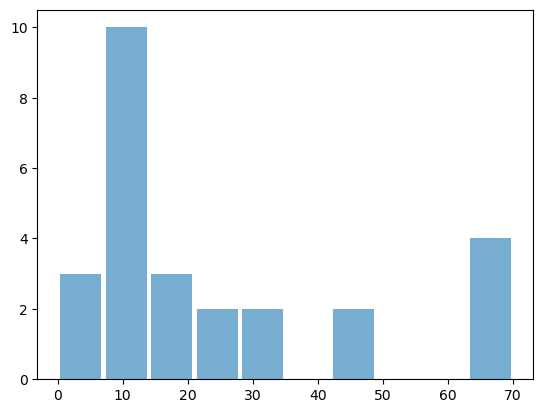

In [137]:
binEdges = [0,7,14,21,28,35,42,49,56,63,70]

height, bins, patches = plt.hist(daysLate1,
                                 binEdges,
                                 histtype = "bar",
                                 rwidth = 0.9,
                                 color="tab:blue",
                                 alpha= .6
                                )
                                
plt.show()

### In Case You're Curious....**NOT REQUIRED!**

Many times I will include in the lab notebook examples of enhanced tools that go way beyond what I expect for the lab. If you have a coding background or you're just curious you can look through these examples to get a sense of some additional options. To be clear, there are truly remarkable things you can do in python plots with pyplot and the other tools in ```matplotlib```. The link below takes you to the ```matplotlib``` example gallery which is overwhelming.

[Matplotlib](https://matplotlib.org/3.1.1/gallery/index.html)

#### This Example:

**Assign a color name:** 

As I make the plot more complex I will want to use the same color for everything associated with data set 1 and a different color for data set 2. In each plot element I will have to tell the plotting code what color to use. If I then change the color I have to go manually change it in multiple lines of code. That's aggravating. It's much easier to create a variable that 'holds' the color that I want. For those who are new to coding this sort of variable is called a ```string``` variable because it contains a string of characters. To define a string variable (simplest way) set the variable equal to some set of characters within quotes. Python will automatically assume that you intend for the variable to be a string of characters. 
```
data1Color = "tab:blue"
data2Color = "tab:red"
```
**Create a Figure with option for multiple plots**

```figHist, axHist = plt.subplots()```

This command does two things. It creates a overall object called a figure that contains all the plots I want to make. Within that figure are a number of axes objects which are the individual plots within the figure. If I have just one plot I create just one set of axes. In this case the figure is called figHist and the only 'plot' is called axHist.

**Create a vertical line to indicate the mean:**

We could certainly create a vertical line as a function but it's a common enough need that pyplot has a built in function to do this called, remarkably, ```vlines```. Here is the format and the meaning of the arguments.

```
axHist.vlines(data1mean,
              0,
              10,
              color = data1Color,
              linestyle = '-',
              linewidth = 2.,
              label = "data1 mean")
axHist.vlines(data2mean,
```
argument 1: data1mean -- 'x' value where I want the vertical line placed -- the data1mean in this case
arg2, arg3: minimum and maximum y values for the vertical line. In this case from 0 to 10. 
color, linestyle, linewidth, and label are standard style arguments that are similar in all pyplot commands.

**Size of the Figure:**

```figHist.set_size_inches(10, 9)```

This command to the figure sets the physical size of the plot in inches. Amusingly or irritatingly, there is no direct metric equivalent such as set_size_cm. This allows me to control the size of the plot for visibility.

**Show Grid Lines**

```axHist.grid()```

For each plot object you can choose to show the grid associated with your axis variables this can make it easier to see what the values are on the plot. I'm sure that are some interesting effects that I can get with the arguments for the grid command but I haven't explored them yet.

**Legend**

```plt.legend(loc=1)```

The legend is a helpful tool for reminding the viewer which color or line represents what feature of your data. There are many options here but the only one I am using at the moment is the loc (location) argument. This tells pyplot where I want the legend to be placed on the plot. Mostly pyplot does pretty good putting it out of the way by default but if you need to control the location try changing the 1 (1 = top right) to other values. loc must be an integer from 1 to 9.

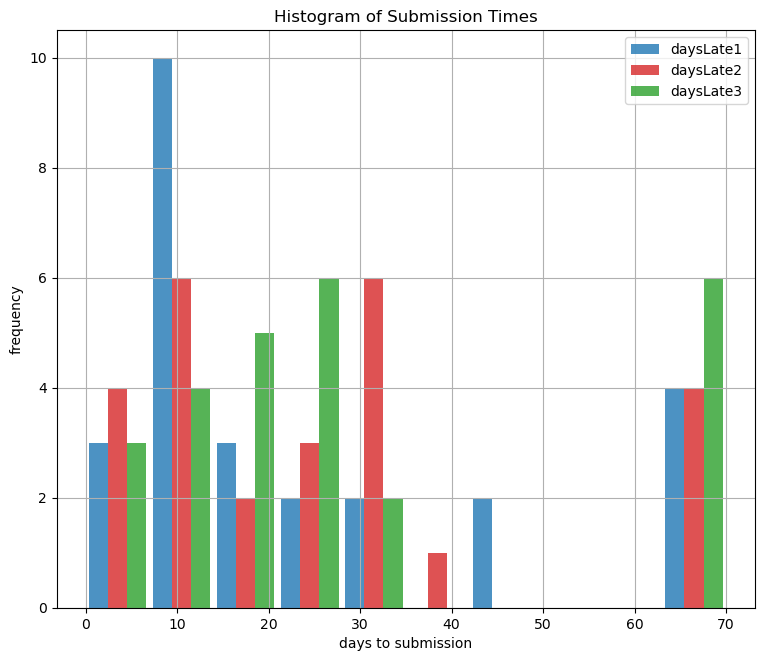

In [158]:
# Choose my number of bins and the range of the histogram again.
binEdges = [0,7,14,21,28,35,42,49,56,63,70]

# Assign particular colors to each data set
data1Color = "tab:blue"
data2Color = "tab:red"
data3Color = "tab:green"

# Explicitly create a figure with a particular plot 'axHist' contained within the figure
figHist, axHist = plt.subplots()
height, bins, patches = axHist.hist([daysLate1,daysLate2,daysLate3],
                                 binEdges,
                                 histtype = "bar",
                                 rwidth = 0.9,
                                 color=[data1Color,data2Color,data3Color],
                                 alpha= .8,
                                 label=['daysLate1','daysLate2','daysLate3'])

# Set the size of my plot for better visibility
figHist.set_size_inches(9, 7.5)

# turn on grid lines to help interpretation
axHist.grid()

# Label the figure
plt.xlabel('days to submission')
plt.ylabel('frequency')
plt.title('Histogram of Submission Times')

# uncomment this line if I want to save a png of the plot for other purposes
#figHist.savefig("ENGR102Hist.png")

# show a legend for what the different parts of the plot mean. The legend grabs the 'lable'
# from each plot command to create this
plt.legend(loc=1)
plt.show()

In [ ]:
# Reminder -- we have already determined data1mean and data2mean
# see previous cell for description of arguments.

axHist.vlines(data1mean,
              0,
              10,
              color = data1Color,
              linestyle = '-',
              linewidth = 2.,
              label = "data1 mean")
axHist.vlines(data2mean,
              0,
              10,
              color = data2Color,
              linestyle = '-',
              linewidth = 2.,
              label = "data2 mean")